# Fuel Consumption dataset

### Dataset Description  <a id='fuel'>
    
**Objective**
Our objective is to predict the fuel consumption so that we can economize the fuel consumption

Columns

1.Payload-Describes the loaded cargo.

2.Reliability-Probability of this route to be on time according to historical data.

3.Season-Describes the weather condition. 0 is good weather and 1 is bad weather

4.Net-This is a discrete quantitative variable that describes the quality of the roadnet. 1 is bad quality, 2 is mediocre and 3 is good quality

5.Fuel-The dependent variable. It is describing the fuel consumption of a truck when doing this route

6.LoadValue-This is the value of the cargo of the truck.

7.TransmissionType-Truck can have automatic or manual transmission.

### 1. Importing packages and dataset <a id='packages'>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
fuel = pd.read_csv('fuel_consumption.csv')

### 2. Exploring the dataset  <a id='explore'>

In [3]:
# Head of the dataset
fuel.head()

,Unnamed: 0,Payload,Reliability,Season,Net,Fuel,LoadValue,TransmissionType
0,0,268.003362,88.942169,0,3,13.033955,1130.150394,automatic
1,1,270.695677,86.018913,0,3,12.843801,1137.342936,manual
2,2,268.346849,85.945960,0,3,12.500423,1319.950261,automatic
3,3,253.712697,87.986605,0,3,11.987058,1662.979622,automatic
4,4,240.949546,83.871310,0,3,12.248381,1674.107415,manual


In [4]:
# Removing the Unnamed: 0 column
fuel = fuel.drop('Unnamed: 0',1)

In [5]:
# Shape of the dataset
fuel.shape

(4493, 7)

In [6]:
# Info of the dataset
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4493 entries, 0 to 4492
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Payload           4493 non-null   float64
 1   Reliability       4493 non-null   float64
 2   Season            4493 non-null   int64  
 3   Net               4493 non-null   int64  
 4   Fuel              4493 non-null   float64
 5   LoadValue         4493 non-null   float64
 6   TransmissionType  4493 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 245.8+ KB


### 3 . Performing Descriptive Statistics on the dataset**

In [7]:
# Summary statistics
fuel.describe()

,Payload,Reliability,Season,Net,Fuel,LoadValue
count,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000
mean,284.053496,70.184271,0.146227,2.380147,16.508160,854.382437
std,12.344016,6.665746,0.353373,0.557214,1.846029,249.432115
min,228.025383,48.145788,0.000000,1.000000,11.298344,152.690191
25%,276.898803,65.418693,0.000000,2.000000,15.169328,674.397696
50%,286.560013,70.238216,0.000000,2.000000,16.442109,830.769184
75%,293.842742,74.921809,0.000000,3.000000,17.773924,1010.278817
max,299.999307,90.315143,1.000000,3.000000,23.335635,1967.946647


**As we could see the max and min are almost same for all the columns so no need of scaling**

### 4. Checking for null values  <a id='null'>

In [8]:
# Null values check
fuel.isnull().sum()

Payload             0
Reliability         0
Season              0
Net                 0
Fuel                0
LoadValue           0
TransmissionType    0
dtype: int64

**We could see that there are no null values present in the dataset**

### 5. Data Visualizations on the dataset <a id='dv'>

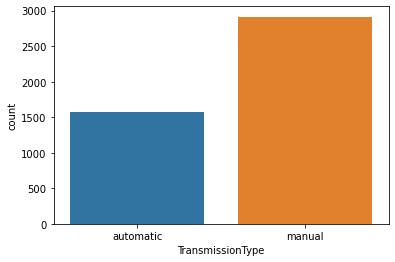

In [9]:
# Countplot for Transmission Type
sns.countplot(x='TransmissionType',data=fuel)

**We could see there are more cars of the Transmission Type manual this may be due to the cost difference between them**

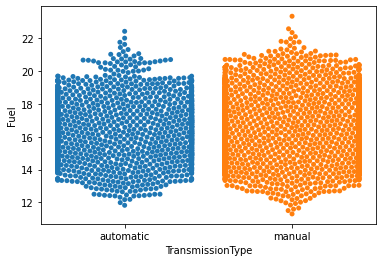

In [10]:
# Swarmplot for Transmission Type vs Fuel
sns.swarmplot(x='TransmissionType',y='Fuel',data=fuel)

**We could see that the fuel consumption is almost same for both the Transmission Type so fuel consumption is not dependent on Transmission Type**

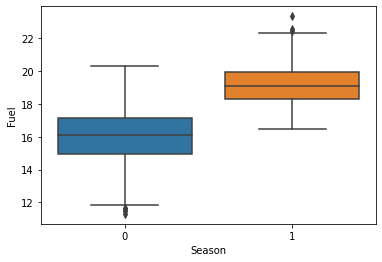

In [11]:
# Boxplot for Season vs Fuel
sns.boxplot(x='Season',y='Fuel',data=fuel)

**We could see that most of the fuel consumption happened when the weather is good although even some happened during when weather is bad this may be due to some uncontrollable circumstances**

Lets check if Reliability has any effect on weather conditions

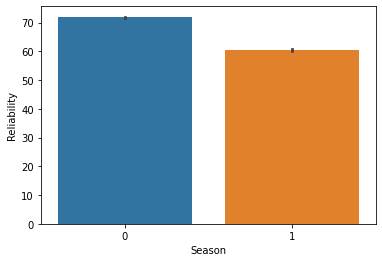

In [12]:
# Barplot for Season vs Reliability
sns.barplot(x='Season',y='Reliability',data=fuel)

**Well we could see that the Reliability is less for when weather condition is bad so there have been delays in reaching the destination**

Lets check how Fuel Consumption related to Reliability

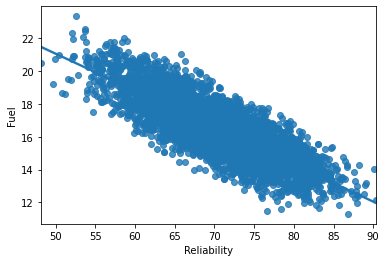

In [13]:
# Regression plot for Reliability vs Fuel
sns.regplot(x='Reliability',y='Fuel',data=fuel)

**We could see Fuel and Reliability are in a negative linear relationship with each other so with increase in fuel consumption the reliability decreases which means if people try to keep up their travel time on track then there is chance of fuel consumption to be reduced**

Lets check if there is relationship between fuel consumption and roadnet quality

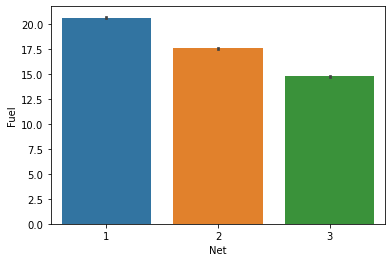

In [14]:
# Barplot for Net vs Fuel
sns.barplot(x='Net',y='Fuel',data=fuel)

**We could see a decreasing trend so with increase in quality the fuel consumption gets reduced (ie) the more the good quality the less the fuel consumption**

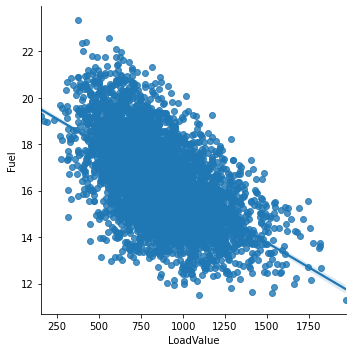

In [15]:
# Linear Regression plot for Load Value vs Fuel
sns.lmplot(x='LoadValue',y='Fuel',data=fuel)

**We could see that with increase in LoadValue the Fuel consumption decreases this may be due to the increased weight in the truck,as weight is very much more the speed of the truck decreases thereby fuel consumption also reduces**

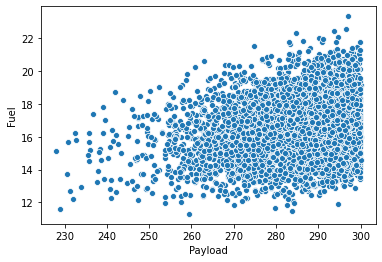

In [16]:
# Scatterplot for Payload vs Fuel
sns.scatterplot(x='Payload',y='Fuel',data=fuel)

**We could see that with increase in Payload the Fuel consumption also increases but stops at a point**

### 6. Label Encoding  <a id='le'>

In [17]:
# Label encoding the Transmission Type
fuel['TransmissionType'] = fuel['TransmissionType'].map({'manual':0,'automatic':1})

### 7. Perform all the models including Boosting and analyze the metrics

In [18]:
# Assigning x and y variables
x = fuel.drop('Fuel',1)
y = fuel['Fuel']

In [19]:
# Importing train test split and splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

### Linear Regression  <a id='lr'>

In [20]:
# Importing Linear Regression and fitting the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [21]:
# Importing metrics and evaluating the model
from sklearn import metrics

In [22]:
# RMSE score 
lr_rmse = np.sqrt(metrics.mean_squared_error(lr_pred,y_test))
lr_rmse

0.7439800555211273

In [23]:
# R2 score
lr_r2score = metrics.r2_score(lr_pred,y_test)
lr_r2score

0.8069903295246739

In [24]:
# Train score
lr_train = lr.score(x_train,y_train)
lr_train

0.8338348615004628

In [25]:
# Test score
lr_test = lr.score(x_test,y_test)
lr_test

0.8363680910278398

### Decision Tree  <a id='dt'>

In [26]:
# Importing Decision Tree and performing decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

In [27]:
# RMSE score for Decision Tree
dt_rmse = np.sqrt(metrics.mean_squared_error(dt_pred,y_test))
dt_rmse

1.0514105572077246

In [28]:
# R2 score for Decision Tree
dt_r2score = metrics.r2_score(dt_pred,y_test)
dt_r2score

0.6835239292276966

In [29]:
# Train score for Decision Tree
dt_train = dt.score(x_train,y_train)
dt_train

1.0

In [30]:
# Test score for Decision Tree
dt_test = dt.score(x_test,y_test)
dt_test

0.6731939577764415

**Parameter Tuning**

In [31]:
# Importing Randomizedsearchcv and finding out optimal parameters for Decision Tree
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth': np.arange(1,20),'criterion':['mse','mae']}
dt = DecisionTreeRegressor()
tree = RandomizedSearchCV(dt, params, cv=3 , return_train_score = True) # RandomizedSearchCV
tree.fit(x,y)# Fit

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
                   return_train_score=True)

In [32]:
# optimal parameters
tree.best_params_

{'max_depth': 6, 'criterion': 'mse'}

In [33]:
# Fitting the model and training and testing after parameter tuning
dtr = DecisionTreeRegressor(criterion='mse',max_depth=7)
dtr.fit(x_train,y_train)
dtr_pred = dtr.predict(x_test)

In [34]:
# RMSE score for DT after parameter tuning
dt_tune_rmse = np.sqrt(metrics.mean_squared_error(dtr_pred,y_test))
dt_tune_rmse

0.7847182692753657

In [35]:
# R2 score for DT after parameter tuning
dt_tune_r2score = metrics.r2_score(dtr_pred,y_test)
dt_tune_r2score

0.7963263508773124

In [36]:
# Train score for DT after parameter tuning
dt_tune_train = dtr.score(x_train,y_train)
dt_tune_train

0.8570101229038211

In [37]:
# Test score for DT after parameter tuning
dt_tune_test = dtr.score(x_test,y_test)
dt_tune_test

0.8179574384413755

### Random Forest  <a id='rf'>

In [38]:
# Importing Random Forest Regressor and fitting the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [39]:
# RMSE score for Random Forest
rf_rmse = np.sqrt(metrics.mean_squared_error(rf_pred,y_test))
rf_rmse

0.7786916813319552

In [40]:
# R2 Score for Random Forest
rf_r2score = metrics.r2_score(rf_pred,y_test)
rf_r2score

0.7988765765855668

In [41]:
# Train score for Random Forest
rf_train = rf.score(x_train,y_train)
rf_train

0.9737121051835024

In [42]:
# Test score for Random Forest
rf_test = rf.score(x_test,y_test)
rf_test

0.8207428526123721

**Parameter Tuning**

In [43]:
# Using Randomized SearchCV and finding optimal parameters
rf = RandomForestRegressor()
params1 = {'n_estimators': np.arange(1,20),'criterion':['mse','mae']}
forest = RandomizedSearchCV(rf, params, cv=3 , return_train_score = True) # GridSearchCV
forest.fit(x,y)# Fit

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
                   return_train_score=True)

In [44]:
# optimal parameters
forest.best_params_

{'max_depth': 6, 'criterion': 'mse'}

In [45]:
# Random Forest after parameter tuning
rfr = RandomForestRegressor(criterion='mse',max_depth=6)
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)

In [46]:
# RMSE score  for Random Forest after parameter tuning
rf_tune_rmse = np.sqrt(metrics.mean_squared_error(rfr_pred,y_test))
rf_tune_rmse

0.7418689211707321

In [47]:
# R2 score for Random Forest after parameter tuning
rf_tune_r2score = metrics.r2_score(rfr_pred,y_test)
rf_tune_r2score

0.8114843271119634

In [48]:
# Train score for Random Forest after parameter tuning
rf_tune_train = rfr.score(x_train,y_train)
rf_tune_train

0.855435837159738

In [49]:
# Test score for Random Forest after parameter tuning
rf_tune_test = rfr.score(x_test,y_test)
rf_tune_test

0.8372954245349393

###  Support Vector Machine <a id = 'svm'>

In [50]:
# Importing Support Vector Regressor and fitting the model
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)

In [51]:
# RMSE score for SVM
svm_rmse = np.sqrt(metrics.mean_squared_error(svm_pred,y_test))
svm_rmse

1.4273603662606589

In [52]:
# R2 score for SVM
svm_r2score = metrics.r2_score(svm_pred,y_test)
svm_r2score

-0.6644586045070149

In [53]:
# Train score for SVM
svm_train = svm.score(x_train,y_train)
svm_train

0.4086146197301853

In [54]:
# Test score for SVM
svm_test = svm.score(x_test,y_test)
svm_test

0.39770025748818616

**Parameter Tuning**

In [55]:
# Using Randomized Search cv to find the optimal parameters
params2 = {'kernel':['linear','rbf'],'C': [0.01, 0.1, 1, 10],'gamma': [0.01,0.1,1,10]}
svr = SVR()
support = RandomizedSearchCV(svr, params2, cv=3 , return_train_score = True) # RandomizedSearchCV
support.fit(x,y)# Fit

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1, 10],
                                        'kernel': ['linear', 'rbf']},
                   return_train_score=True)

In [56]:
# optimal parameters
support.best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 1}

In [58]:
# Fitting the model and training and testing
svrr = SVR(C = 1,gamma = 1,kernel = 'linear')
svrr.fit(x_train,y_train)
svrr_pred = svrr.predict(x_test)

In [59]:
# RMSE score for SVM after parameter tuning
svm_tune_rmse = np.sqrt(metrics.mean_squared_error(svrr_pred,y_test))

In [60]:
svm_tune_rmse

0.7566153671313828

In [61]:
# R2 score for SVM after parameter tuning
svm_tune_r2score = metrics.r2_score(svrr_pred,y_test)
svm_tune_r2score

0.7836985190815362

In [62]:
# Train score for SVM after parameter tuning
svm_tune_train = svrr.score(x_train,y_train)
svm_tune_train

0.8285310604865921

In [63]:
# Test score for SVM after parameter tuning
svm_tune_test = svrr.score(x_test,y_test)
svm_tune_test

0.8307628410602835

###  KNearest Neighbors <a id = 'knn'>

In [64]:
# Importing KNearest Neighbors and fitting the model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [65]:
# RMSE score for KNN
knn_rmse = np.sqrt(metrics.mean_squared_error(knn_pred,y_test))
knn_rmse

1.2567924781144897

In [66]:
# R2 score for KNN
knn_r2score = metrics.r2_score(knn_pred,y_test)
knn_r2score

0.18820733937518175

In [67]:
# Train score for KNN
knn_train = knn.score(x_train,y_train)
knn_train

0.7003942788675213

In [68]:
# Test score for KNN
knn_test = knn.score(x_test,y_test)
knn_test

0.5330476599203882

**Parameter Tuning**

In [69]:
# Finding optimal parameters using Randomized Search CV
params4 = {'leaf_size':np.arange(1,50),'n_neighbors':np.arange(1,30),'p':[1,2]}
knn = KNeighborsRegressor()
neighbor = RandomizedSearchCV(knn, params4, cv=3 , return_train_score = True) # RandomizedSearchCV
neighbor.fit(x,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(),
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]},
                   return_train_score=True)

In [70]:
# Optimal parameters
neighbor.best_params_

{'p': 1, 'n_neighbors': 6, 'leaf_size': 33}

In [71]:
# Fitting the model and training and testing
knn = KNeighborsRegressor(n_neighbors=6,p=1,leaf_size=33)
knn.fit(x_train,y_train)
knnr_pred = knn.predict(x_test)

In [72]:
# RMSE score for KNN after parameter tuning
knn_tune_rmse = np.sqrt(metrics.mean_squared_error(knnr_pred,y_test))
knn_tune_rmse

1.1805754258079173

In [73]:
# R2 score for KNN after parameter tuning
knn_tune_r2score = metrics.r2_score(knnr_pred,y_test)
knn_tune_r2score

0.2766778384848684

In [74]:
# Train score for KNN after parameter tuning
knn_tune_train = knn.score(x_train,y_train)
knn_tune_train

0.7162344956472382

In [75]:
# Test score for KNN after parameter tuning
knn_tune_test = knn.score(x_test,y_test)
knn_tune_test

0.5879661574098767

### Ada Boost Classifier <a id = 'ada'>

In [76]:
# Fitting the Ada Boost model
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
ab_pred = ab.predict(x_test)

In [77]:
# RMSE score for Ada Boost
ab_rmse = np.sqrt(metrics.mean_squared_error(ab_pred,y_test))
ab_rmse

0.7664887443492865

In [78]:
# R2 score for Ada Boost
ab_r2score = metrics.r2_score(ab_pred,y_test)
ab_r2score

0.8177622353628705

In [79]:
# Train score for Ada Boost
ab_train = ab.score(x_train,y_train)
ab_train

0.828608434682612

In [80]:
# Test score for Ada Boost
ab_test = ab.score(x_test,y_test)
ab_test

0.826317135142692

**Parameter Tuning**

In [81]:
# Finding the optimal parameters for Ada Boost Regressor using Randomized Search CV

param_grid1 = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1],'loss':['linear','square','exponential']}
 

AB = RandomizedSearchCV(ab,param_distributions=param_grid1,
                           cv = 5,
                           n_jobs=-1,
                           verbose=2)
AB.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.8s finished


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': range(5, 20, 2)},
                   verbose=2)

In [82]:
# optimal parameters
AB.best_params_

{'n_estimators': 9, 'loss': 'linear', 'learning_rate': 0.5}

In [83]:
# Fitting the model after parameter tuning
abr = AdaBoostRegressor(n_estimators=9,learning_rate=0.5,loss='linear')
abr.fit(x_train,y_train)
abr_pred = abr.predict(x_test)

In [84]:
# RMSE score for Ada Boost after parameter tuning
ab_tune_rmse = np.sqrt(metrics.mean_squared_error(abr_pred,y_test))
ab_tune_rmse

0.7580484774685542

In [85]:
# R2 score for Ada Boost after parameter tuning
ab_tune_r2score = metrics.r2_score(abr_pred,y_test)
ab_tune_r2score

0.8078038639125839

In [86]:
# Train score for Ada Boost after parameter tuning
ab_tune_train = abr.score(x_train,y_train)
ab_tune_train

0.8296826177182797

In [87]:
# Test score for Ada Boost after parameter tuning
ab_tune_test = abr.score(x_test,y_test)
ab_tune_test

0.8301211273797244

### Gradient Boosting <a id = 'grad'>

In [88]:
# Fitting the Gradient Boost model
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)

In [89]:
# RMSE score for Gradient Boosting
gb_rmse = np.sqrt(metrics.mean_squared_error(gb_pred,y_test))
gb_rmse

0.7386806543811121

In [90]:
# R2 score for Gradient Boosting
gb_r2score = metrics.r2_score(gb_pred,y_test)
gb_r2score

0.8090391195706546

In [91]:
# Train score for Gradient Boosting
gb_train = gb.score(x_train,y_train)
gb_train

0.8540639577270662

In [92]:
# Test score for Gradient Boosting
gb_test = gb.score(x_test,y_test)
gb_test

0.838690902618341

**Parameter tuning**

In [93]:
# Finding the optimal parameters For Gradient Boosting Regressor using Randomized Search CV

param_grid1 = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}
 

GB = RandomizedSearchCV(gb,param_distributions=param_grid1,
                           cv = 5,
                           n_jobs=-1,
                           verbose=2)
GB.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'n_estimators': range(5, 20, 2)},
                   verbose=2)

In [94]:
# optimal parameters
GB.best_params_

{'n_estimators': 13, 'learning_rate': 0.5}

In [96]:
# Fitting the Gradient model after parameter tuning
gbr = GradientBoostingRegressor(n_estimators=13,learning_rate=0.5)
gbr.fit(x_train,y_train)
gbr_pred = gbr.predict(x_test)

In [97]:
# RMSE score for Gradient Boosting after parameter tuning
gb_tune_rmse = np.sqrt(metrics.mean_squared_error(gbr_pred,y_test))
gb_tune_rmse

0.7412901396855301

In [98]:
# R2 score for Gradient Boosting after parameter tuning
gb_tune_r2score = metrics.r2_score(gbr_pred,y_test)
gb_tune_r2score

0.8104290418298172

In [99]:
# Train score for Gradient Boosting after parameter tuning
gb_tune_train = gbr.score(x_train,y_train)
gb_tune_train

0.8487001198614198

In [100]:
# Test score for parameter tuning
gb_tune_test = gbr.score(x_test,y_test)
gb_tune_test

0.8375491989116343

### XG Boost <a id = 'xgb'>

In [101]:
from xgboost.sklearn import XGBRegressor

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [102]:
# Fitting the model
xgb = XGBRegressor()

In [103]:
# Training the model
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
# Testing the model
xgb_pred=xgb.predict(x_test)

In [105]:
# RMSE score for XG Boost
xgb_rmse = np.sqrt(metrics.mean_squared_error(xgb_pred,y_test))
xgb_rmse

0.7893424213171168

In [106]:
# R2 score for XG Boost
xgb_r2score = metrics.r2_score(xgb_pred,y_test)
xgb_r2score

0.7946803127142945

In [107]:
# Train score for XG Boost
xgb_train = xgb.score(x_train,y_train)
xgb_train

0.9466888776383516

In [108]:
# Test score for XG Boost
xgb_test = xgb.score(x_test,y_test)
xgb_test

0.8158056528797142

**Parameter Tuning**

In [109]:
# Finding optimal parameters for XG Boost Regressor using Randomized Search CV
param_grid1 = {"max_depth": [10,15,20,30],
              "n_estimators": range(5,20,2) , 
              "gamma": [0.03,0.05], 
              "learning_rate": [0.01,0.05]}
 

XGB = RandomizedSearchCV(xgb,param_distributions=param_grid1,
                           cv = 5)
XGB.fit(x,y)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_

In [110]:
# optimal parameters
XGB.best_params_

{'n_estimators': 19, 'max_depth': 30, 'learning_rate': 0.05, 'gamma': 0.05}

In [111]:
# Fitting the model after parameter tuning
xgbr = XGBRegressor(n_estimators=19,max_depth=30,learning_rate=0.05,gamma=0.05)

In [112]:
# Training the model after parameter tuning
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.05, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=30,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=19, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
# Testing the model after parameter tuning
xgbr_pred = xgbr.predict(x_test)

In [114]:
# RMSE score for XG Boost after parameter tuning
xgb_tune_rmse = np.sqrt(metrics.mean_squared_error(xgbr_pred,y_test))
xgb_tune_rmse

6.0627332121573

In [115]:
# R2 score for XG Boost after parameter tuning
xgb_tune_r2score = metrics.r2_score(xgbr_pred,y_test)
xgb_tune_r2score

-33.0150522713655

In [116]:
# Train score for XG Boost after parameter tuning
xgb_tune_train = xgbr.score(x_train,y_train)
xgb_tune_train

-10.092954276656869

In [117]:
# Test score for XG Boost after parameter tuning
xgb_tune_test = xgbr.score(x_test,y_test)
xgb_tune_test

-9.866315888774412

### 8.9 Comparison Table <a id = 'ct'>

In [118]:
# Creating dictionary for all the metrics and models
metrics = {'Metrics': ['Before Parameter Tune Train Score','Before Parameter Tune Test Score','After Parameter Tune Train Score','After Parameter Tune Test Score','Before Parameter Tune RMSE Score','After Parameter Tune RMSE Score','Before Parameter Tune R2 Score','After Parameter Tune R2 Score'],'Linear Regression':[lr_train,lr_test,'NA','NA',lr_rmse,'NA',lr_r2score,'NA'],
          'Decision Tree Regressor':[dt_train,dt_test,dt_tune_train,dt_tune_train,dt_rmse,dt_tune_rmse,dt_r2score,dt_tune_r2score],'Ramdom Forest Regressor':[rf_train,rf_test,rf_tune_train,rf_tune_test,rf_rmse,rf_tune_rmse,rf_r2score,rf_tune_r2score],'Support Vector Regressor':[svm_train,svm_test,'NA','NA',svm_rmse,'NA',svm_r2score,'NA'],
          'KNearestNeighbor Regressor':[knn_train,knn_test,knn_tune_train,knn_tune_test,knn_rmse,knn_tune_rmse,knn_r2score,knn_tune_r2score],
          'XG Boost Regressor':[xgb_train,xgb_test,xgb_tune_train,xgb_tune_test,xgb_rmse,xgb_tune_rmse,xgb_r2score,xgb_tune_r2score],
          'Ada Boost Regressor':[ab_train,ab_test,ab_tune_train,ab_tune_test,ab_rmse,ab_tune_rmse,ab_r2score,ab_tune_r2score],
          'Gradient Boosting Regressor':[gb_train,gb_test,gb_tune_train,gb_tune_test,gb_rmse,gb_tune_rmse,gb_r2score,gb_tune_r2score]}

In [119]:
# Converting dictionary to dataframe
metrics = pd.DataFrame(metrics)

In [120]:
# Dataframe of metrics
metrics

,Metrics,Linear Regression,Decision Tree Regressor,Ramdom Forest Regressor,Support Vector Regressor,KNearestNeighbor Regressor,XG Boost Regressor,Ada Boost Regressor,Gradient Boosting Regressor
0,Before Parameter Tune Train Score,0.833835,1.000000,0.973712,0.408615,0.700394,0.946689,0.828608,0.854064
1,Before Parameter Tune Test Score,0.836368,0.673194,0.820743,0.3977,0.533048,0.815806,0.826317,0.838691
2,After Parameter Tune Train Score,NA,0.857010,0.855436,NA,0.716234,-10.092954,0.829683,0.848700
3,After Parameter Tune Test Score,NA,0.857010,0.837295,NA,0.587966,-9.866316,0.830121,0.837549
4,Before Parameter Tune RMSE Score,0.74398,1.051411,0.778692,1.42736,1.256792,0.789342,0.766489,0.738681
5,After Parameter Tune RMSE Score,NA,0.784718,0.741869,NA,1.180575,6.062733,0.758048,0.741290
6,Before Parameter Tune R2 Score,0.80699,0.683524,0.798877,-0.664459,0.188207,0.794680,0.817762,0.809039
7,After Parameter Tune R2 Score,NA,0.796326,0.811484,NA,0.276678,-33.015052,0.807804,0.810429


**Comparing all the models Gradient Boosting Regressor,Ada Boost Regressor and Random Forest Regressor are good models**

### 9. Perform the Stacking models Voting and Mlxtend and analyze the metrics

### Voting Regressor <a id = 'vr'>

In [121]:
# Assigning estimator models for voting classifier
vote_est = [('rf',rf),('lr',lr),('SVM',svm)]

In [122]:
# Importing Voting Regressor
from sklearn.ensemble import VotingRegressor
vote = VotingRegressor(estimators=vote_est)

In [123]:
# Fitting the model
vote.fit(x_train,y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('lr', LinearRegression()), ('SVM', SVR())])

In [124]:
# Testing the model
vote_pred = vote.predict(x_test)

In [125]:
# Importing metrics
from sklearn import metrics

In [126]:
# RMSE score for Voting Regressor
vote_rmse = np.sqrt(metrics.mean_squared_error(vote_pred,y_test))
vote_rmse

0.8344387045736845

In [127]:
# R2 score for Voting Regressor
vote_r2score = metrics.r2_score(vote_pred,y_test)
vote_r2score

0.6526126520579847

In [128]:
# Train score for Voting Regressor
vote_train = vote.score(x_train,y_train)
vote_train

0.8489744760426136

In [129]:
# Test score for Voting Regressor
vote_test = vote.score(x_test,y_test)
vote_test

0.7941578587409771

### Mlxtend Stacking Regressor <a id = 'msr'>

In [130]:
# mlxtend regressor
from mlxtend.regressor import StackingRegressor

In [131]:
# Assigning individual models to variables
xgb = XGBRegressor()
ada = AdaBoostRegressor()
grad = GradientBoostingRegressor()

In [132]:
# Fitting the model
st = StackingRegressor(regressors=[dt,rf,svm,xgb,ada,grad],meta_regressor=lr)

In [133]:
# Training the model
st.fit(x_train,y_train)

StackingRegressor(meta_regressor=LinearRegression(),
                  regressors=[DecisionTreeRegressor(), RandomForestRegressor(),
                              SVR(),
                              XGBRegressor(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                          

In [134]:
# Testing the model
st_pred = st.predict(x_test)

In [135]:
# RMSE score for Stacking Regressor
st_rmse = np.sqrt(metrics.mean_squared_error(st_pred,y_test))
st_rmse

1.0417706797399588

In [136]:
# R2 score for Stacking Regressor
st_r2score = metrics.r2_score(st_pred,y_test)
st_r2score

0.6924840401885379

In [137]:
# Train score for Stacking Regressor
st_train = st.score(x_train,y_train)
st_train

1.0

In [138]:
# Test score for Stacking Regressor
st_test = st.score(x_test,y_test)
st_test

0.6791591405816477

### 10. Create a dataframe with model Stacking model names and metric scores and compare along with the first dataframe and give inference

In [139]:
# Creating dictionary for all the metrics and converting it to dataframe
metrics_stack = {'Models': ['Voting Regressor','Stacking Regressor'],'RMSE score':[vote_rmse,st_rmse],'R2 Score':[vote_rmse,st_rmse],'Train score':[vote_train,st_train],'Test score':[vote_test,st_test]}

metrics_stack = pd.DataFrame(metrics_stack)

In [140]:
# Dataframe
metrics_stack

,Models,RMSE score,R2 Score,Train score,Test score
0,Voting Regressor,0.834439,0.834439,0.848974,0.794158
1,Stacking Regressor,1.041771,1.041771,1.000000,0.679159


**The best model being Voting Regressor as Stacking Regressor is Overfitting**

### 11. Perform Vecstack,analyze and give your inference

In [141]:
# Importing Vecstack
from vecstack import stacking

In [142]:
#1st level model
models = [lr,rf,dt,svm]
S_train, S_test = stacking(models, x_train, y_train, x_test, 
    regression = True, metric = metrics.r2_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)

task:         [regression]
metric:       [r2_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LinearRegression]
    fold  0:  [0.84151448]
    fold  1:  [0.82306824]
    fold  2:  [0.83420362]
    fold  3:  [0.83286564]
    ----
    MEAN:     [0.83291300] + [0.00656835]
    FULL:     [0.83297615]

model  1:     [RandomForestRegressor]
    fold  0:  [0.81488899]
    fold  1:  [0.80155679]
    fold  2:  [0.80704373]
    fold  3:  [0.81304661]
    ----
    MEAN:     [0.80913403] + [0.00524909]
    FULL:     [0.80918141]

model  2:     [DecisionTreeRegressor]
    fold  0:  [0.66836157]
    fold  1:  [0.64323980]
    fold  2:  [0.64802270]
    fold  3:  [0.67100114]
    ----
    MEAN:     [0.65765630] + [0.01217918]
    FULL:     [0.65772215]

model  3:     [SVR]
    fold  0:  [0.37202948]
    fold  1:  [0.39121811]
    fold  2:  [0.39121044]
    fold  3:  [0.40970690]
    ----
    MEAN:     [0.39104123] + [0.01332210]
    FULL:     [0.39116375]



**Comparing all the 4 Linear Regression and Random Forest Regressor are the best models**

In [143]:
#2nd level model
models = [knn,xgb,grad,ada]
S_train, S_test = stacking(models, x_train, y_train, x_test, 
    regression = True, metric = metrics.r2_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)

task:         [regression]
metric:       [r2_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [KNeighborsRegressor]
    fold  0:  [0.57685603]
    fold  1:  [0.56177436]
    fold  2:  [0.55320665]
    fold  3:  [0.59519433]
    ----
    MEAN:     [0.57175784] + [0.01596149]
    FULL:     [0.57178978]

model  1:     [XGBRegressor]
    fold  0:  [0.80638024]
    fold  1:  [0.78827459]
    fold  2:  [0.79510013]
    fold  3:  [0.79947173]
    ----
    MEAN:     [0.79730667] + [0.00658530]
    FULL:     [0.79735664]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.83702827]
    fold  1:  [0.82252574]
    fold  2:  [0.83037849]
    fold  3:  [0.83190063]
    ----
    MEAN:     [0.83045828] + [0.00520040]
    FULL:     [0.83051059]

model  3:     [AdaBoostRegressor]
    fold  0:  [0.82477314]
    fold  1:  [0.81695014]
    fold  2:  [0.82505702]
    fold  3:  [0.82350742]
    ----
    MEAN:     [0.82257193] + [0.00329775]
    FULL:     [0.82263151]



**Comparing all the 4 models Gradient Boosting and Ada Boost Regressor are good models**

### 12. Give the final inference for all the models you have created

Comparing the two Vecstacks created the models Gradient Boosting,Ada Boost Regressor and Linear Regression are best models